## **Project Statement**

Portobello Tech is an app innovator who has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last five years, and salary level.

Data from prior evaluations shows the employees’ satisfaction in the workplace. The data could be used to identify patterns in work style and their interest in continuing to work for the company. 

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over time.

As the ML Developer assigned to the HR Department, you have been asked to create ML programs to:

1.    Perform data quality checks by checking for missing values, if any.
2.    Understand what factors contributed most to employee turnover at EDA.
3.    Perform clustering of employees who left based on their satisfaction and evaluation.
4.    Handle the left Class Imbalance using the SMOTE technique.
5.    Perform k-fold cross-validation model training and evaluate performance. 
6.    Identify the best model and justify the evaluation metrics used. 
7.    Suggest various retention strategies for targeted employees.

In [307]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#ML
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV,KFold, cross_val_score, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score,accuracy_score,f1_score,recall_score

In [ ]:
# Import Dataset
datapath = '<PATH_REDACTED>Documents\\Python Scripts\\1736848217_hr_comma_sep\\'
df= pd.read_csv(datapath+ 'HR_comma_sep.csv')

#### Data Dictionary
{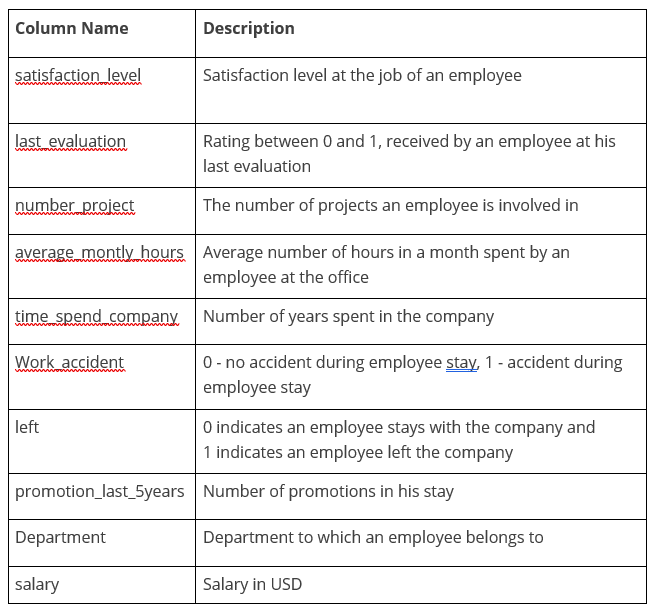}


In [221]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [222]:
df.shape

(14999, 10)

In [223]:
df_orig=df
df_orig.shape

(14999, 10)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [225]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [226]:
cat_cols=('left','sales','salary','Work_accident','promotion_last_5years')
for i in cat_cols:
    print('Unique Values for column ' + i +':', df[i].unique())

Unique Values for column left: [1 0]
Unique Values for column sales: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Unique Values for column salary: ['low' 'medium' 'high']
Unique Values for column Work_accident: [0 1]
Unique Values for column promotion_last_5years: [0 1]


In [227]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [228]:
df.duplicated().sum()

np.int64(3008)

In [229]:
dup_rows = df[df.duplicated()]
print(dup_rows)

       satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
396                     139                   3              0     1   
866                     128                   3              0     1   
1317                    127            

In [230]:
df.drop_duplicates(inplace=True)

In [231]:
df.shape

(11991, 10)

In [232]:
df.duplicated().sum()

np.int64(0)

#### Initial Observation:
* There are 10 columns and 14999 rows in the file
* sales and salary are 2 categorical columns in non-numerical dtype. 
* column sales should be department as per data dictionary and values make sense as well will rename the column
* left,Work_accident,promotion_last_5years are numerical dtype column but values(mean,std, min and max) indicate they are categorical in nature
* There were 3008 duplicate rows in dataset and dropped them keeping the first by default

### Exploratory Data Analysis

In [233]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [234]:
plt.style.use('default')

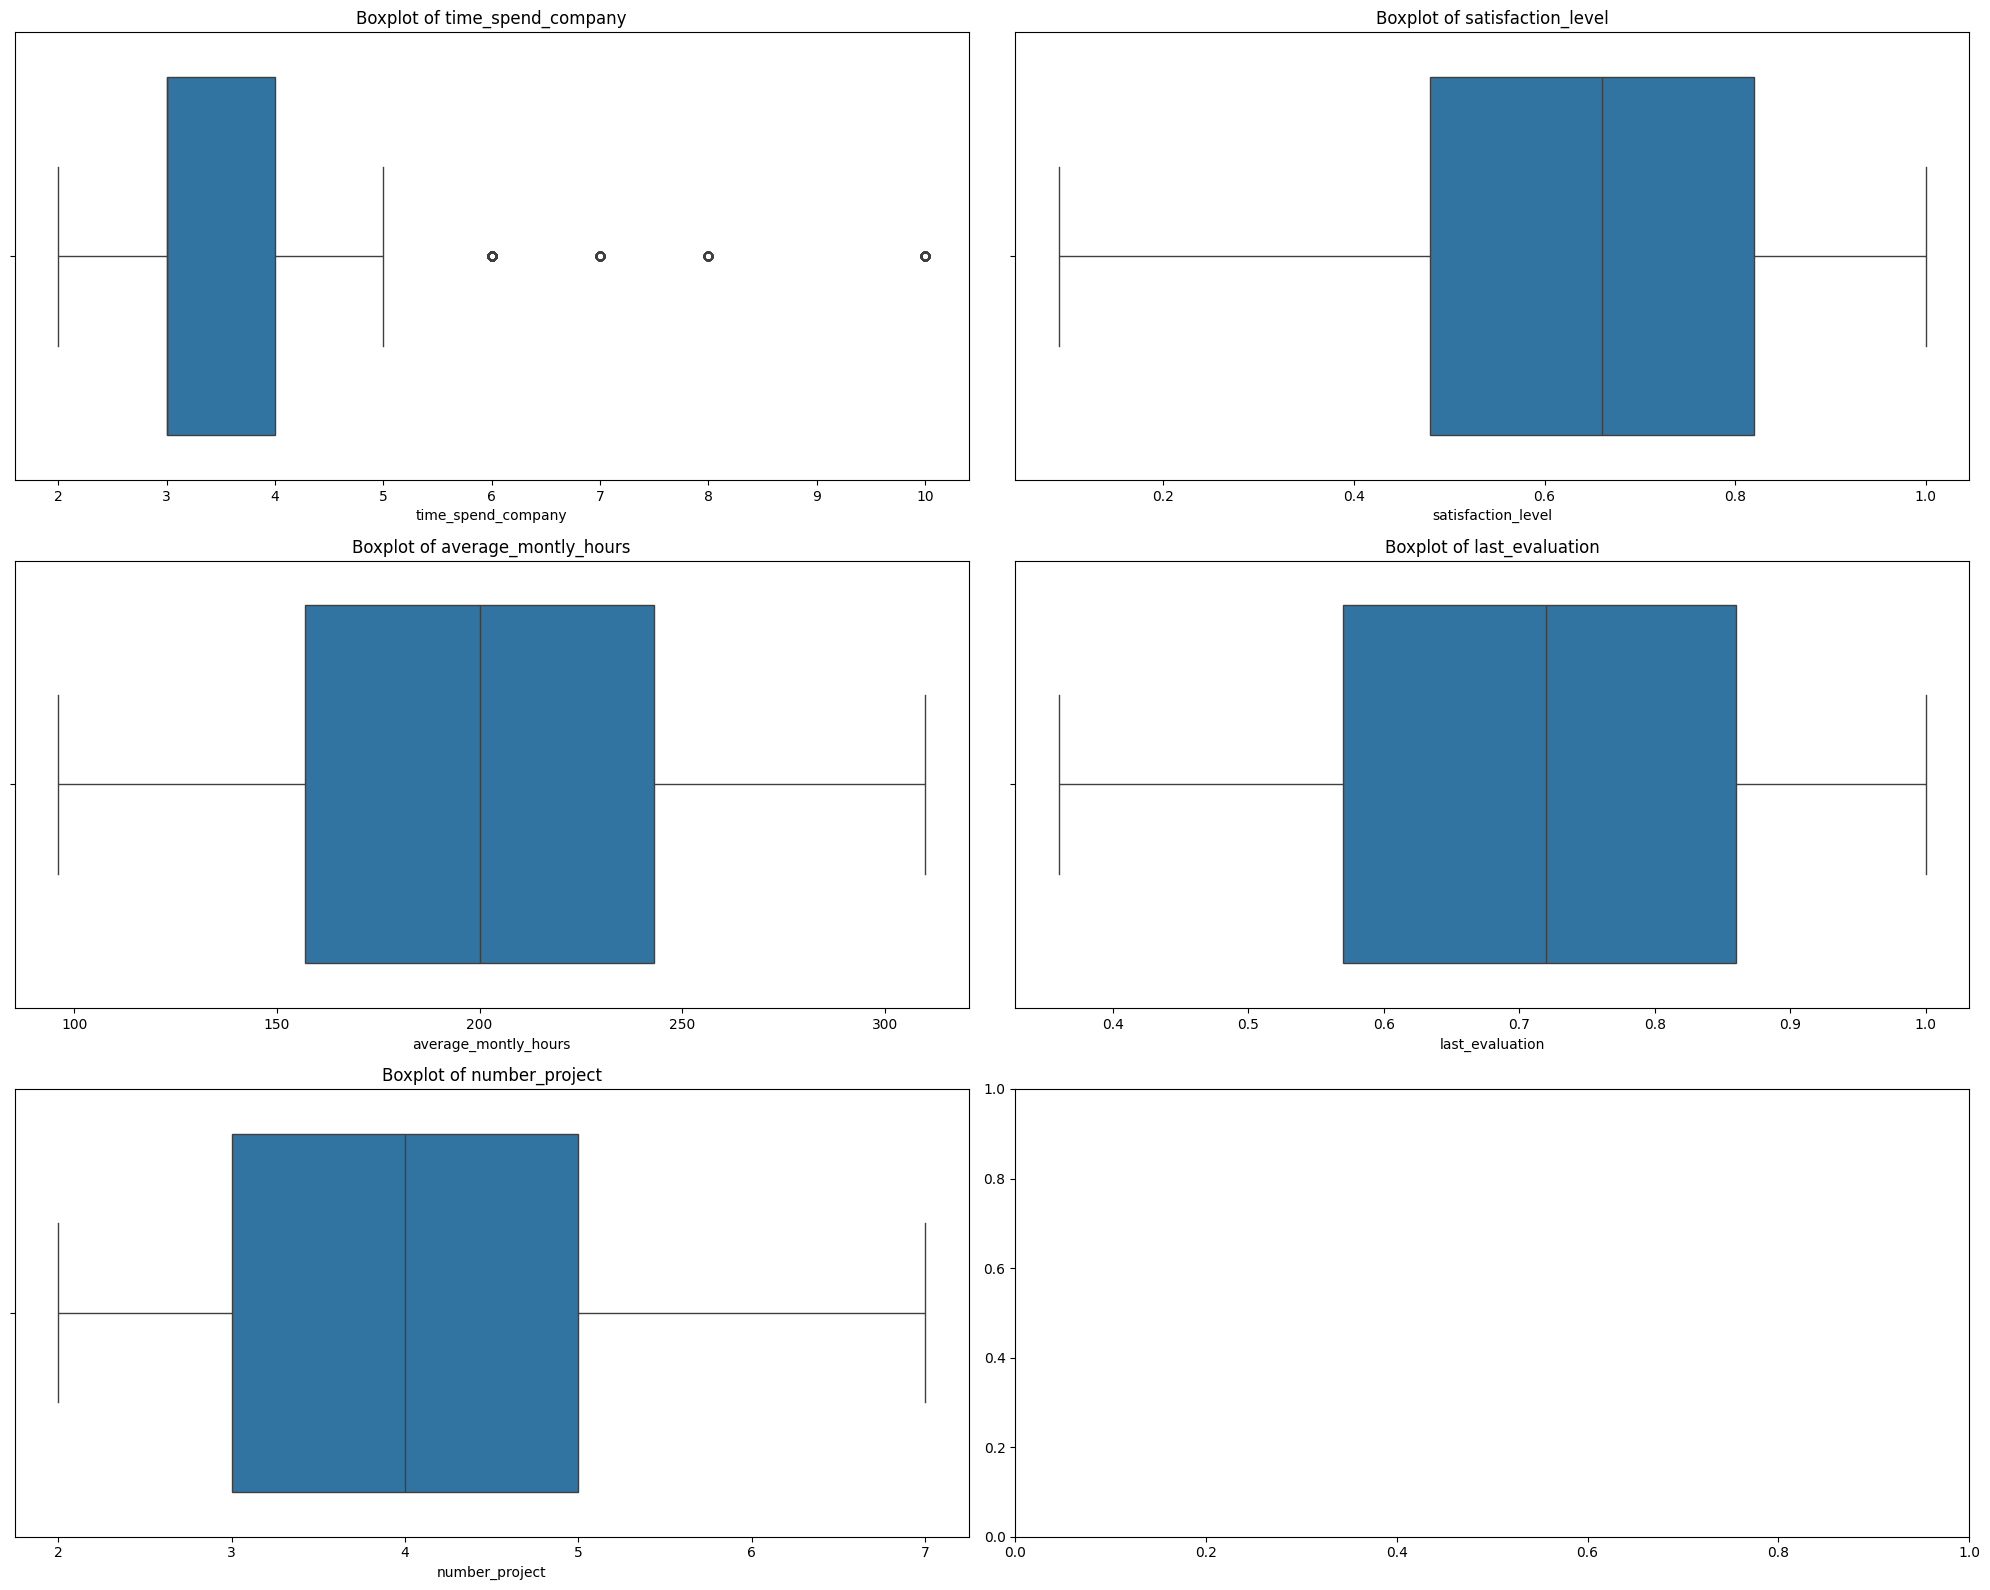

In [235]:
fig,axes = plt.subplots(3,2,figsize=(20,16))
#use python funct to get numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
#exclude categorical columns for distribution
cat_cols = {'left','Work_accident','promotion_last_5years'}
num_cols = list(set(num_cols) - cat_cols)
axes = axes.flatten()
for idx, col in enumerate(num_cols):
       sns.boxplot(data=df, x=col, ax=axes[idx])
       axes[idx].set_title(f'Boxplot of {col}')
plt.tight_layout()

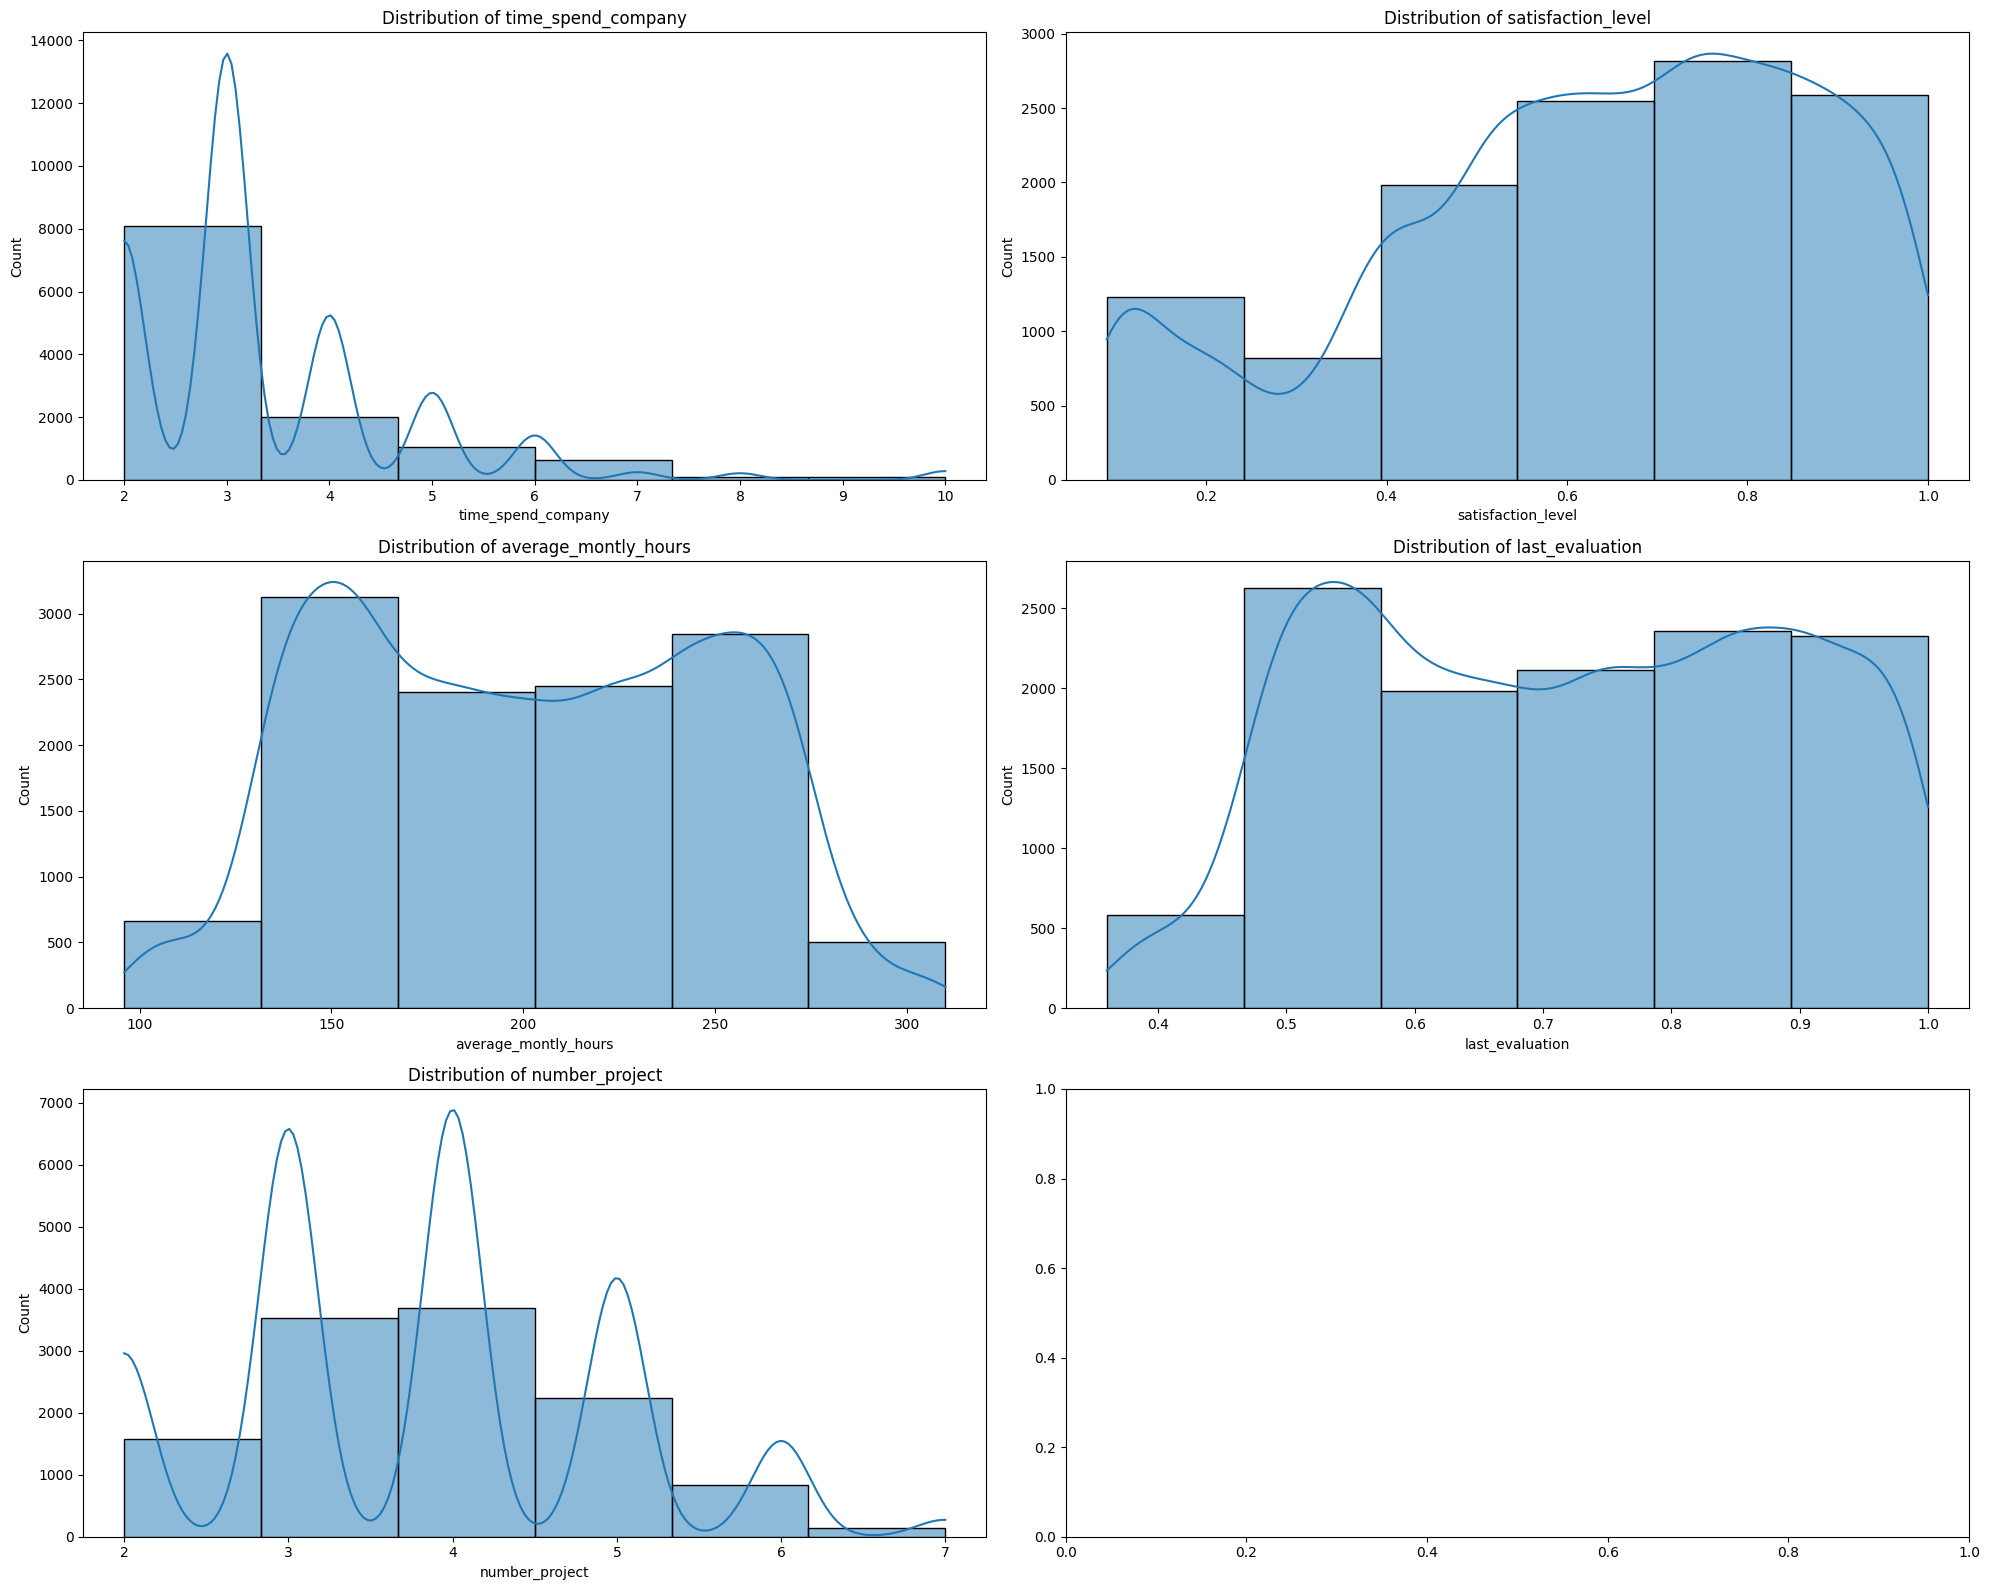

In [236]:
fig,axes = plt.subplots(3,2,figsize=(20,16))
#use python funct to get numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
#exclude categorical columns for distribution
cat_cols = {'left','Work_accident','promotion_last_5years'}
num_cols = list(set(num_cols) - cat_cols)
axes = axes.flatten()
for idx, col in enumerate(num_cols):
       sns.histplot(data=df, x=col, ax=axes[idx],kde=True,bins=6)
       axes[idx].set_title(f'Distribution of {col}')
plt.tight_layout()

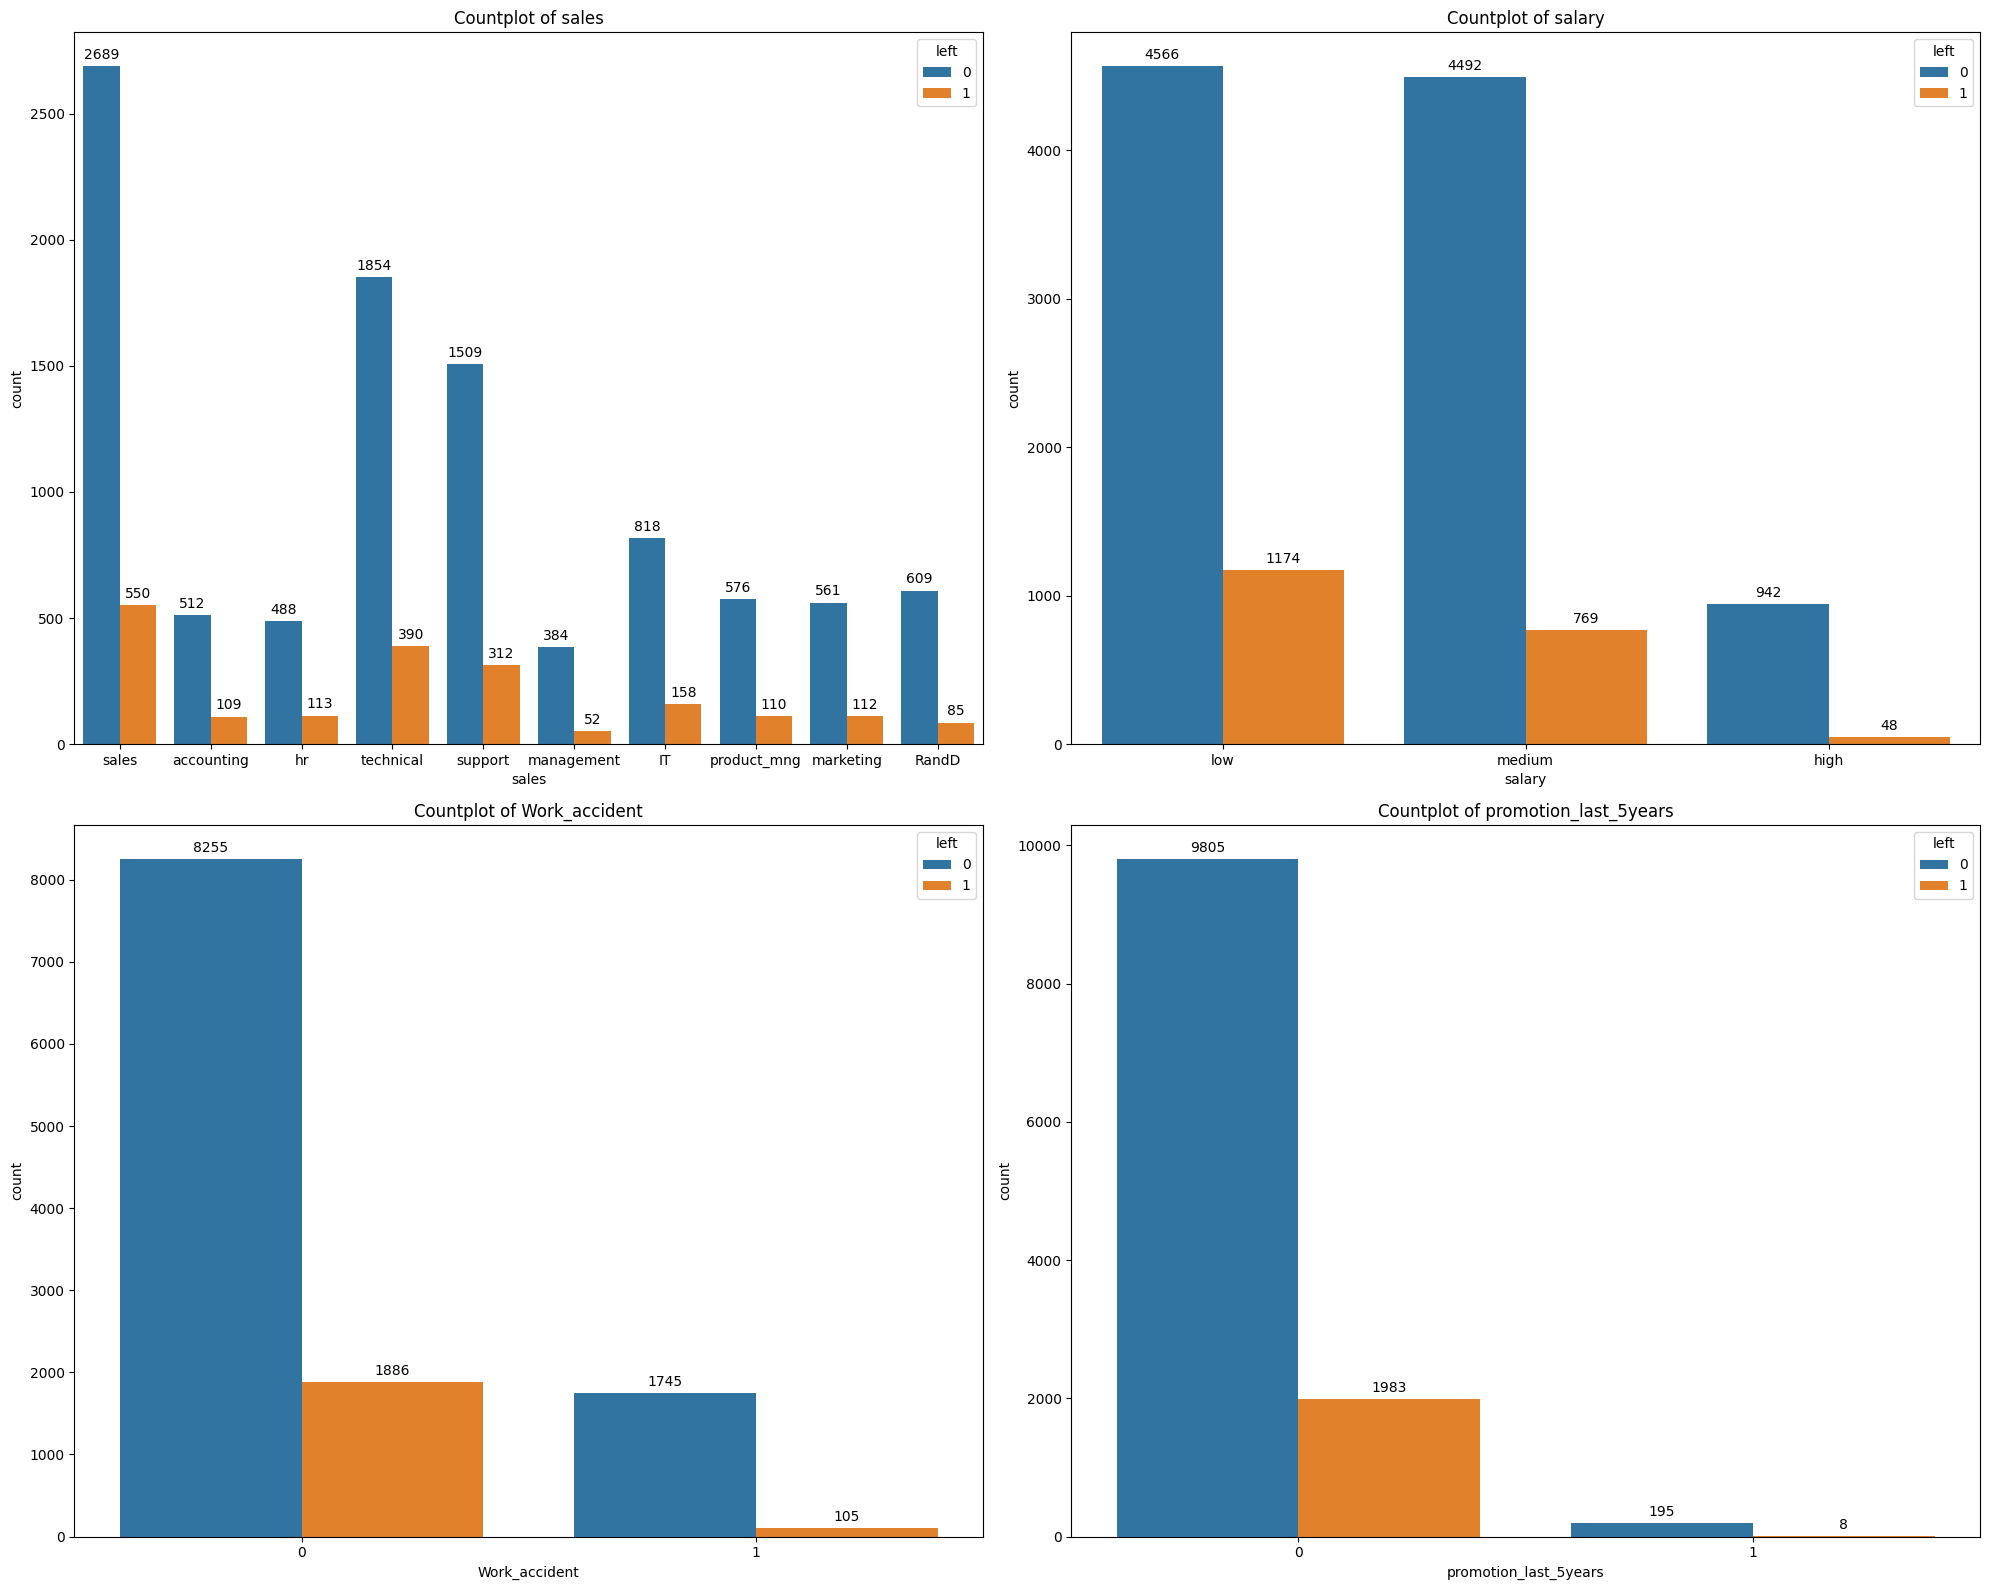

In [237]:
cat_cols = ['sales', 'salary', 'Work_accident','promotion_last_5years']
fig,axes = plt.subplots(2,2,figsize=(20,16))
axes = axes.flatten()
for idx, col in enumerate(cat_cols):
       sns.countplot(data=df, x=col, ax=axes[idx], hue='left')
       axes[idx].set_title(f'Countplot of {col}')
       for a in axes[idx].containers:
              axes[idx].bar_label(a, padding=3)
plt.tight_layout()

In [238]:
df[df.select_dtypes(include=np.number).columns].skew()

satisfaction_level      -0.538702
last_evaluation         -0.031686
number_project           0.332152
average_montly_hours     0.027208
time_spend_company       1.816577
Work_accident            1.914410
left                     1.795135
promotion_last_5years    7.490008
dtype: float64

* There are **fewer people with experience more than 6 years**
* Median experience is 3.5 years
* Median monthly hours is 200 hours with 25 percentile on 160 and 75th percentile on 240 hours
* Median number of projects are 4
* **Sales** department has **most people left** and **management** has **least people left**
* Surprisingly **more people who have faced work accident have stayed with the company** and in contrast people without accident has left in noticeable number. So work accident is not highly correlated to left
* **Majority of employees received promotion in last 5 years have stayed with the company**
* Employees with low salary have left more compared to Medium and High
* **Satisfaction_level is slightly skewed to the left**
* **time_spend_company** is rightly skewed

In [ ]:
corr_cols = df.select_dtypes(include=np.number).columns.to_list()
print(corr_cols)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


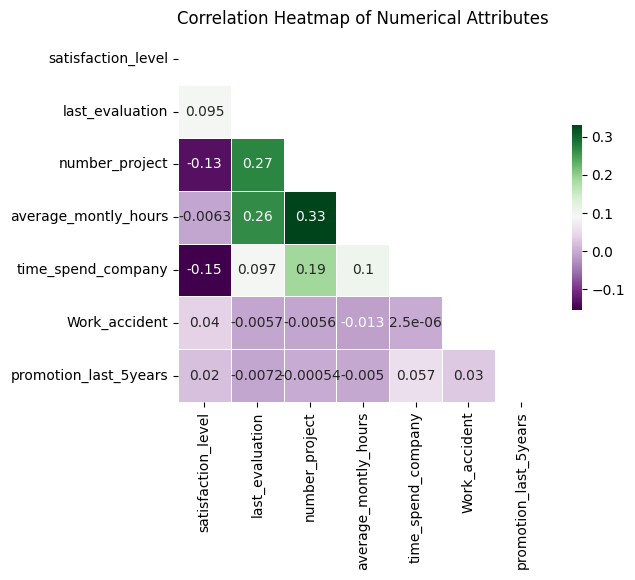

In [240]:
corr_matrix= df[corr_cols].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask,  annot=True,
            square=True, linewidths=.5,cmap='PRGn', cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of Numerical Attributes')
plt.grid(False)
plt.show()

* Strong **positive correlation between average_montly_hours and number_project**; person who works more hours are probably on multiple projects.
* **Negative correlation between satifaction_level and time_spend_company** which makes sense as more years spent in the company satisifaction level slightly decreases.
* **work_accident is weakly correlated to other features**, hence no linear relationship exists

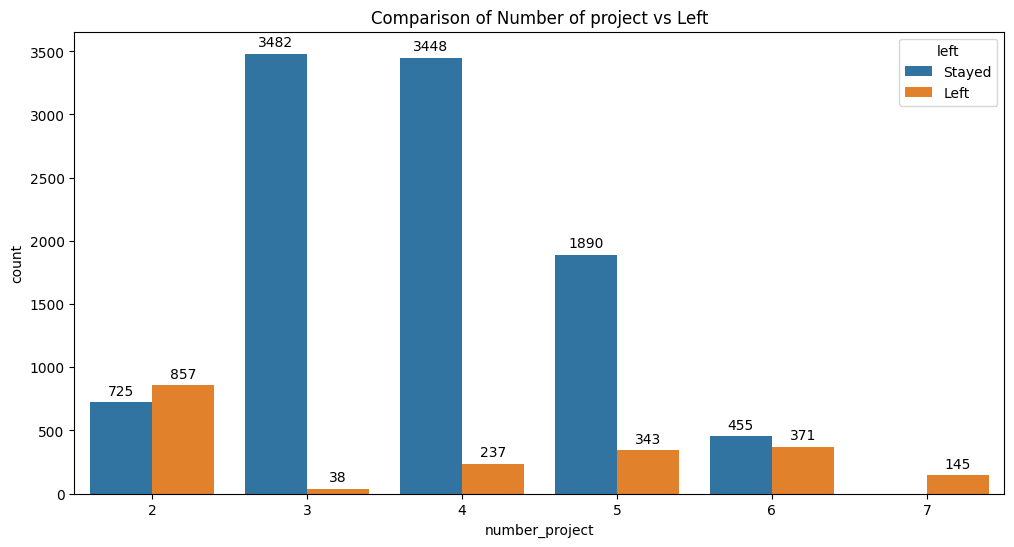

In [241]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='number_project',hue='left')
plt.title('Comparison of Number of project vs Left')
for a in ax.containers:
    ax.bar_label(a, padding=3)
# Get the handles and labels from the plot
handles, labels = ax.get_legend_handles_labels()

# Manually map the labels from '0' and '1' to 'Stayed' and 'Left'
labels_dict = {'0': 'Stayed', '1': 'Left'}
new_labels = [labels_dict[label] for label in labels]

# Re-create the legend with the new labels
ax.legend(handles, new_labels, title='left')

* The **largest group of employees who left worked on 2 projects, but employees with 6 or 7 projects have a much higher probability of leaving**.
* Employees worked on 7 projects have all left 100%. 
* There is **no linear relationship between number of projects worked and left**.

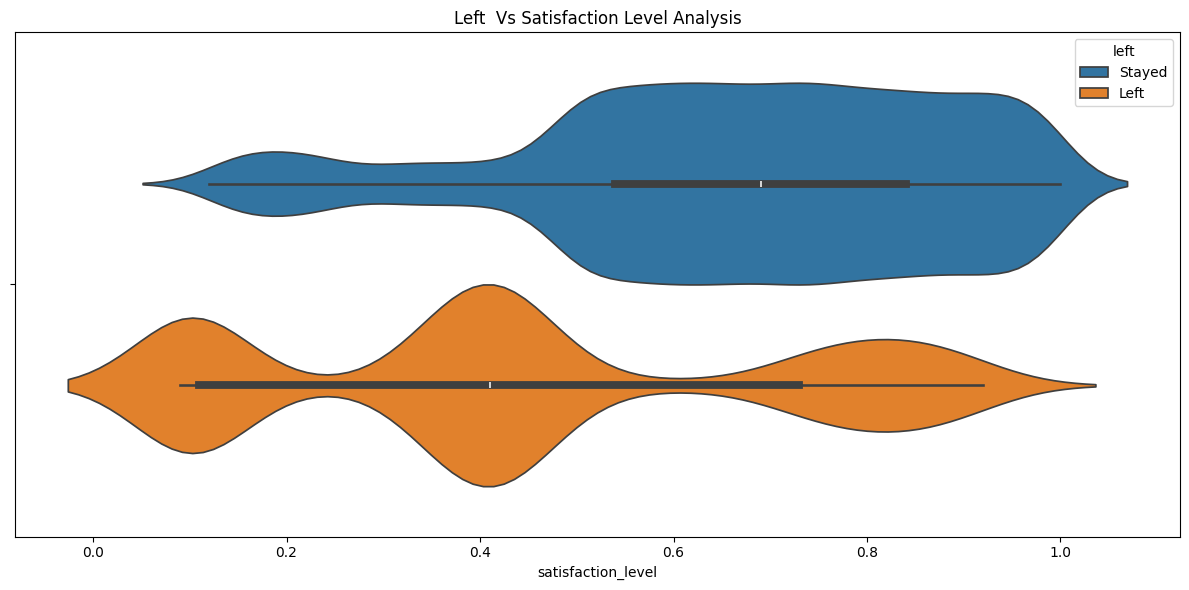

In [242]:
plt.figure(figsize=(12,6))
ax = sns.violinplot(data =df,x=df['satisfaction_level'],hue='left')
plt.title('Left  Vs Satisfaction Level Analysis')
# Get the handles and labels from the plot
handles, labels = ax.get_legend_handles_labels()

# Manually map the labels from '0' and '1' to 'Stayed' and 'Left'
labels_dict = {'0': 'Stayed', '1': 'Left'}
new_labels = [labels_dict[label] for label in labels]

# Re-create the legend with the new labels
ax.legend(handles, new_labels, title='left')
plt.tight_layout()
plt.show()

* There is **no linear relationship between Satisfaction level and left**
* Employees attrition analysis against satisfaction_level
    - They were extremely unhappy (the large peak near 0.1).
    - They were somewhat unhappy but not at the extreme low end (the peak near 0.4). where majority of left employees   fall under
    - Employess with higher satisfaction are no exception and the slight surge near 0.8 shows it.

In [243]:
df.shape

(11991, 10)

In [244]:
df.sample()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
11641,0.22,0.7,4,159,5,0,0,0,management,low


### Data Preprocessing

* Encode categorical columns sales and salary

In [245]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [246]:
sal_map = {'high':2, 'medium':1, 'low':0}
df['salary'] = df['salary'].map(sal_map)
df['salary'].unique()

array([0, 1, 2])

In [247]:
df['salary'].value_counts(normalize=True)

salary
0    0.478692
1    0.438746
2    0.082562
Name: proportion, dtype: float64

In [248]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [249]:
#One hot encoding for sales i.e. department feature
df = pd.get_dummies(df,columns=['sales'], dtype=int)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


* Majority of employees 47% are under low salary range
* Minimum of 8% of employess fall under high salary bucket
* class Imbalance observed in left feature

### Clustering 

Applying K-Means clustering to perform analysis on left due to satisfaction level and last evaluation

In [ ]:
# Subset of data is used to focus on employees left
df_left = df[df['left'] > 0]

In [252]:
# Define the kmeans model with 3 clusters as in requirement
kmeans_model = KMeans(n_clusters=3, random_state=10)

In [253]:
#Fit and run Predictions for cluster
df_left['Cluster'] = kmeans_model.fit_predict(df_left[['satisfaction_level','last_evaluation']])

<PATH_REDACTED>AppData\Local\Temp\ipykernel_41380\4202913160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['Cluster'] = kmeans_model.fit_predict(df_left[['satisfaction_level','last_evaluation']])


In [254]:
# Find density of cluster
df_left['Cluster'].value_counts()

Cluster
0    902
2    555
1    534
Name: count, dtype: int64

In [255]:
# Find centroids for clusters
centroids = kmeans_model.cluster_centers_
print(centroids)
cent_x = centroids[:,0]
cent_y = centroids[:,1]

print('x-coord:',cent_x, 'y-coord:',cent_y)

[[0.41013304 0.51719512]
 [0.1111985  0.86906367]
 [0.80587387 0.91257658]]
x-coord: [0.41013304 0.1111985  0.80587387] y-coord: [0.51719512 0.86906367 0.91257658]


In [ ]:
# Adding centroid coordinates to dataframe for plotting
df_left['CentX'] = df_left['Cluster'].map({0:cent_x[0],
                                 1:cent_x[1],
                                 2:cent_x[2],})

df_left['CentY'] = df_left['Cluster'].map({0:cent_y[0],
                                 1:cent_y[1],
                                 2:cent_y[2],})

df_left.head()

<PATH_REDACTED>AppData\Local\Temp\ipykernel_41380\4017021187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['CentX'] = df_left['Cluster'].map({0:cent_x[0],
<PATH_REDACTED>AppData\Local\Temp\ipykernel_41380\4017021187.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['CentY'] = df_left['Cluster'].map({0:cent_y[0],


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,Cluster,CentX,CentY
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.410133,0.517195
1,0.80,0.86,5,262,6,0,1,0,1,0,...,0,0,0,0,1,0,0,2,0.805874,0.912577
2,0.11,0.88,7,272,4,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0.111199,0.869064
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,2,0.805874,0.912577
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.410133,0.517195


In [288]:
plt.style.use('ggplot')

Text(0, 0.5, 'last_evaluation')

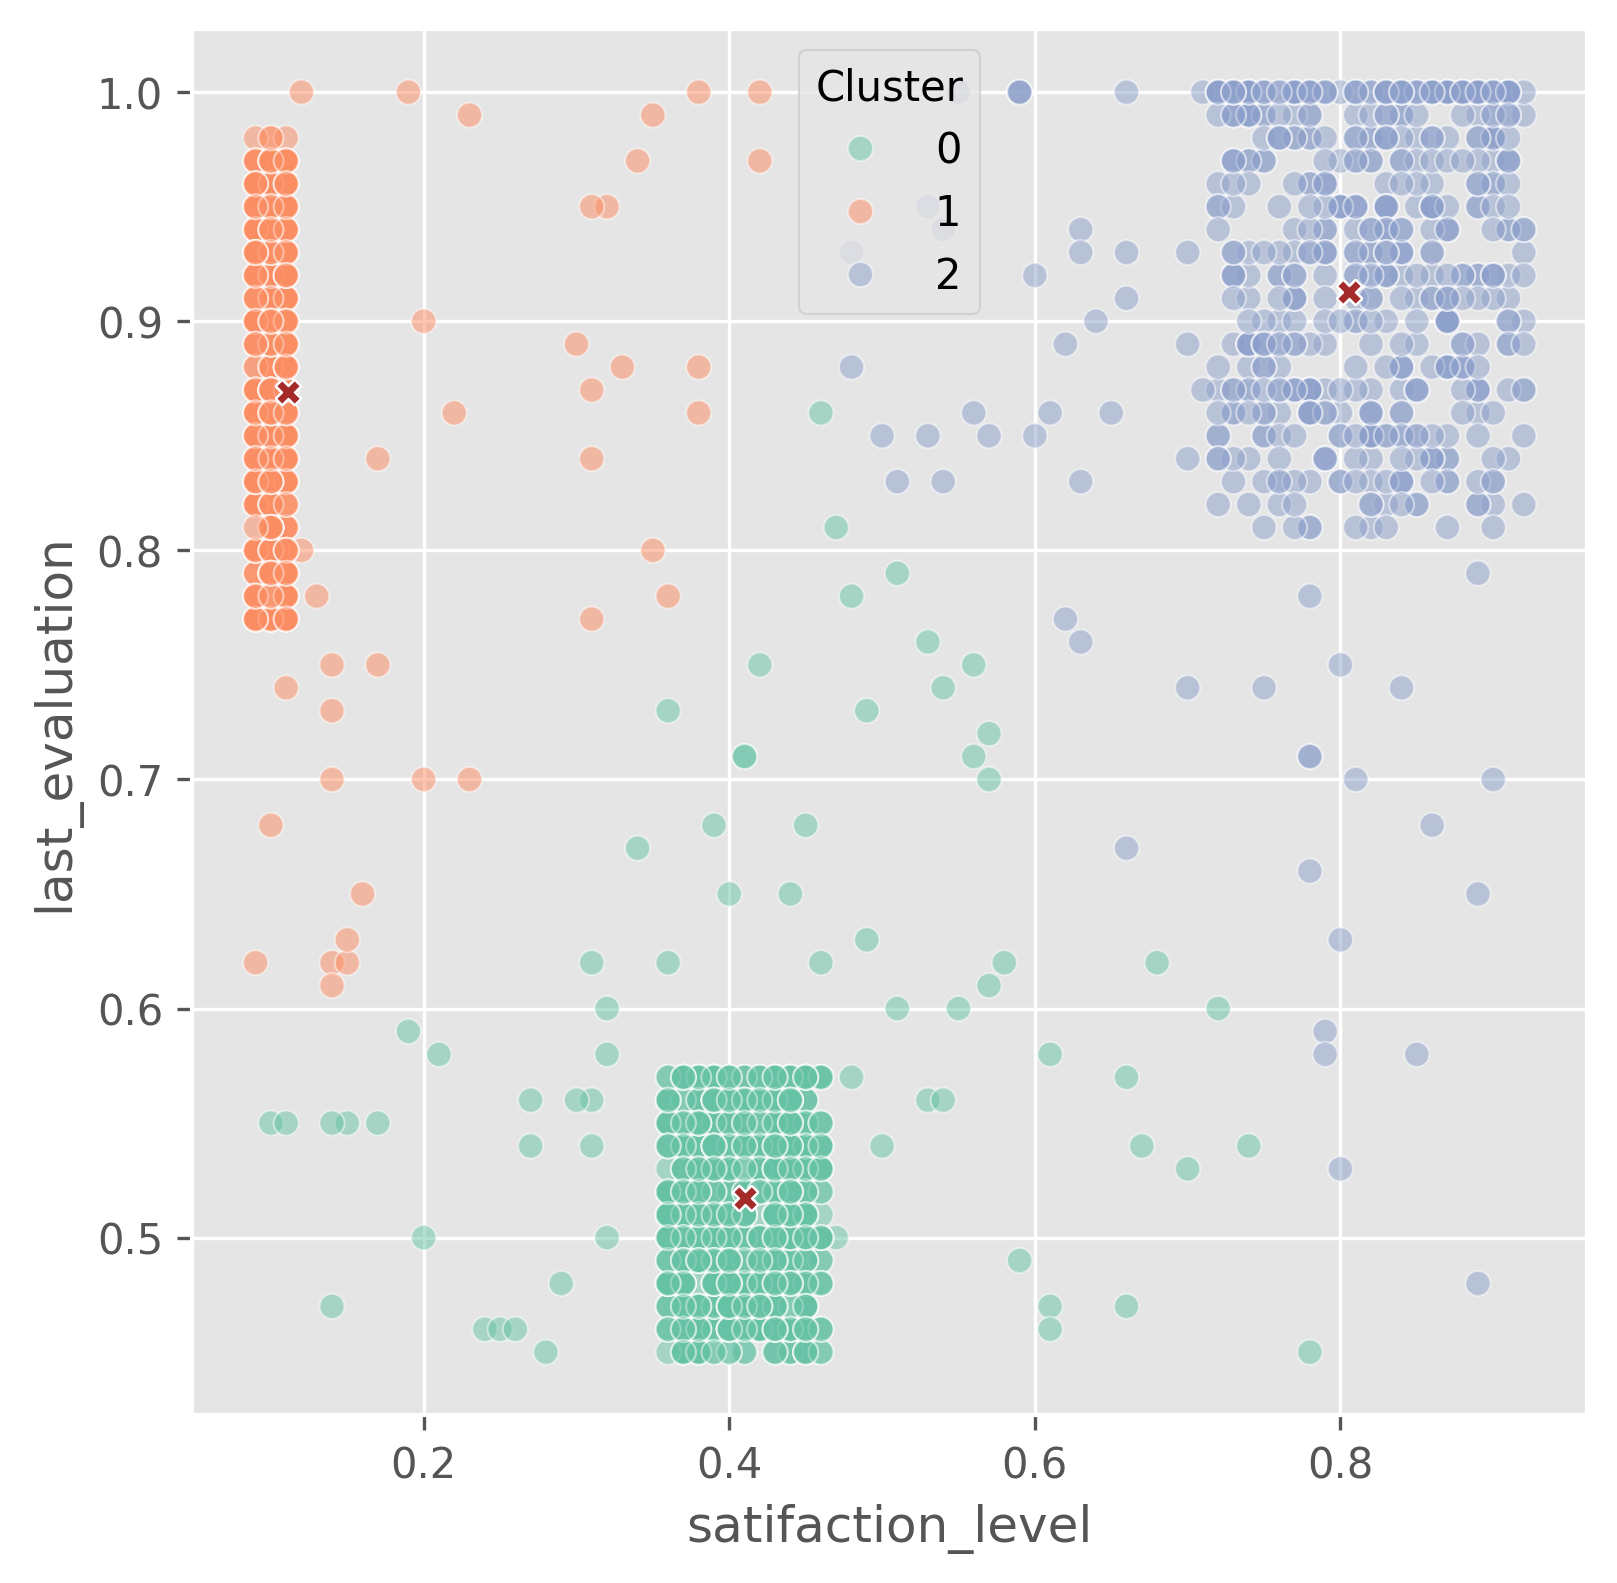

In [ ]:
plt.figure(figsize=(6,6), dpi=300)
sns.scatterplot(x=df_left['satisfaction_level'], y=df_left['last_evaluation'], hue=df_left['Cluster'],palette ='Set2', alpha=0.5)
sns.scatterplot(x=df_left['CentX'], y=df_left['CentY'], marker="X", c='brown')
plt.legend(title='Cluster',loc='upper center')
plt.xlabel('satifaction_level')
plt.ylabel('last_evaluation')

In [260]:
from sklearn.metrics import silhouette_score, silhouette_samples

score = silhouette_score(df_left[['satisfaction_level','last_evaluation']], df_left['Cluster'])
print('Silhouette Score:',score)

Silhouette Score: 0.7951127912228846


In [261]:
df_left['last_evaluation'].describe()

count    1991.000000
mean        0.721783
std         0.197436
min         0.450000
25%         0.520000
50%         0.790000
75%         0.910000
max         1.000000
Name: last_evaluation, dtype: float64

* **Silhouette score 0.8** is closer to 1 which is means not much cluster overlapping and they are distinct
* **Cluster 0** marked in Green are some what happy but mostly getting lower evaluation ratings can be termed as **Underperformers**. Poor performance evaluation played a role in their leaving.
* **Cluster 1** marked in Orange are less satisfied and have higher ratings in last evaluation can be termed as **Unsatisfied High-Performers**. Evaluation didn't impact their decision to leave but other features might have.
* **Cluster 2** marked in Indigo are the employees with higher satisfaction level and higher ratings in   last_evaluation can be termed as **High-Achievers**. Their reason for leaving is unknown at this time other features analysis will shed more light. Neither evaluation not satisfaction caused this decision and need further analysis of salary, number of projects, hours spent etc..

### SMOTE for class imbalance treatment

Employees left are 17% and stayed back are 83% rounded. This is a case of imbalance in target data since left is less than 20% of whole dataset train data set should upsampled to get better model performance.


In [250]:
# inspect for class imbalance #2
df['left'].value_counts(normalize=True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

In [291]:
#Split features and target for scaling and model fitting
X = df.drop(columns='left', axis=1)
y = df['left']

In [292]:
# Standardize features
# Scale data using Minmax Scaler
ss = StandardScaler()

X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [293]:
#Split scaled data into train and test 
#stratify turned on to maintain class representation across train and test similar
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=123,stratify=y)

In [294]:
X_train.shape,X_test.shape

((9592, 18), (2399, 18))

In [297]:
y_train.value_counts()

left
0    7999
1    1593
Name: count, dtype: int64

In [298]:
y_test.value_counts()

left
0    2001
1     398
Name: count, dtype: int64

In [295]:
#initilize SMOTE model with random state per requirement
smote_model = SMOTE(random_state=123)

In [299]:
#fit smote model to upsample
X_resampled, y_resampled = smote_model.fit_resample(X_train, y_train)
#check before and after
X_train.shape, X_resampled.shape

((9592, 18), (15998, 18))

<Axes: xlabel='left'>

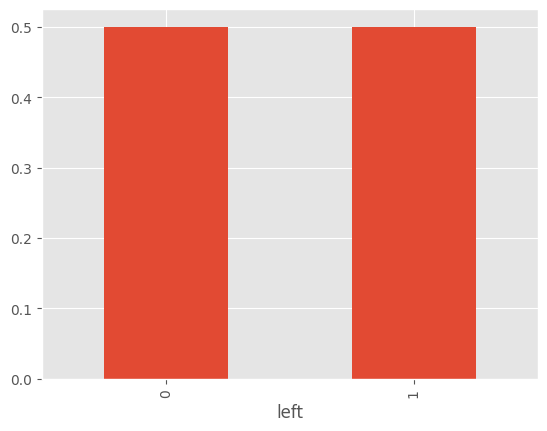

In [302]:
# Class ratio after SMOTE
y_resampled.value_counts(normalize=True).plot(kind='bar')

----------LR-----------
Best Parameters: {'C': 1}
Best Score: 0.8009202962146414
----------RFC-----------
Best Parameters: {'n_estimators': 16}
Best Score: 0.9830520987135527
----------GBC-----------
Best Parameters: {'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best Score: 0.986798026605781


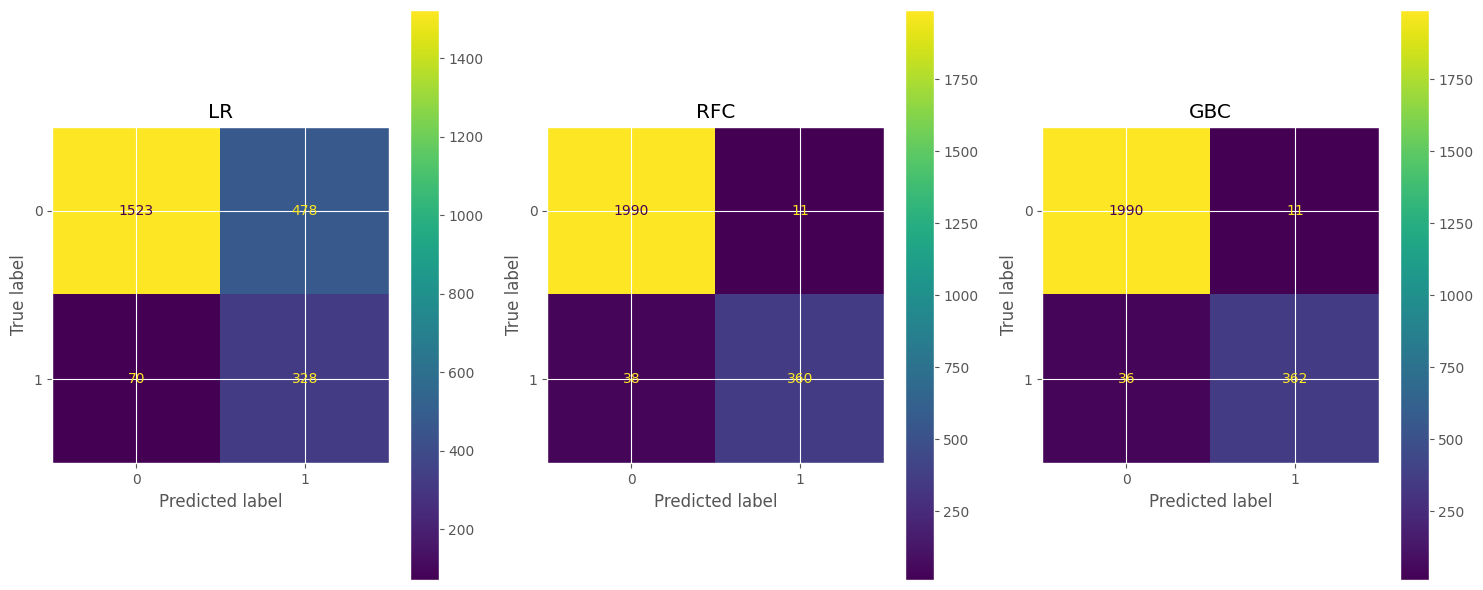

In [304]:
my_classifiers = {
        'LR': LogisticRegression(max_iter=10000),
        'RFC': RandomForestClassifier(),
        'GBC': GradientBoostingClassifier()
                    }

my_param_grids = {
        'LR': {'C': [0.01,0.1, 1]},
        'RFC': {'n_estimators' : [12,14,16]},
        'GBC': {'max_depth': [3, 5, 7],
                'n_estimators': [100, 200, 300],
                'subsample': [0.8, 1.0]}

                    }
y_pred_ = {}
cm_ = {}
disp_ = {}
num_classifiers = len(my_classifiers)
num_cols = 3 # Let's use 3 columns for a clean layout
num_rows = 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, (name, classifier) in enumerate(my_classifiers.items()):
    grid_search = GridSearchCV(classifier, my_param_grids[name], cv=5, scoring='f1_macro')
    grid_search.fit(X_resampled, y_resampled)
    print(f'----------{name}-----------')
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")
    y_pred_[name] = grid_search.best_estimator_.predict(X_test)
    cm_[name] = confusion_matrix(y_test, y_pred_[name])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_[name], display_labels =grid_search.best_estimator_.classes_ )
    disp.plot(ax=axes[i])
    # Set the title for the current subplot
    axes[i].set_title(f'{name}')
plt.tight_layout() # Ensures titles and labels don't overlap
plt.show()

In [358]:
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=7, n_estimators=300, subsample=0.8)

- True Negative: 1990 cases where both the model and the actual data predicts employee stayed
- True Positive: 362 cases where both the model and the actual data shows employee left
- False Negative: 11 cases where the model states left, but actual data shows employee stayed. (Type II Errors)
- False Positive: 36 cases where the model states employee stayed, but actual data shows employee left. (Type I Errors)

**Type-I errors should be minimal for successful predictions i.e. Recall score. From above plot Gradient Boosting Classifier shows the least count hence tuning this model will help make better predictions** 
    
    

In [310]:
kfold = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

LR: AUC= 0.8442645373176961
RFC: AUC= 0.998005173199469
GBC: AUC= 0.9954022803294218


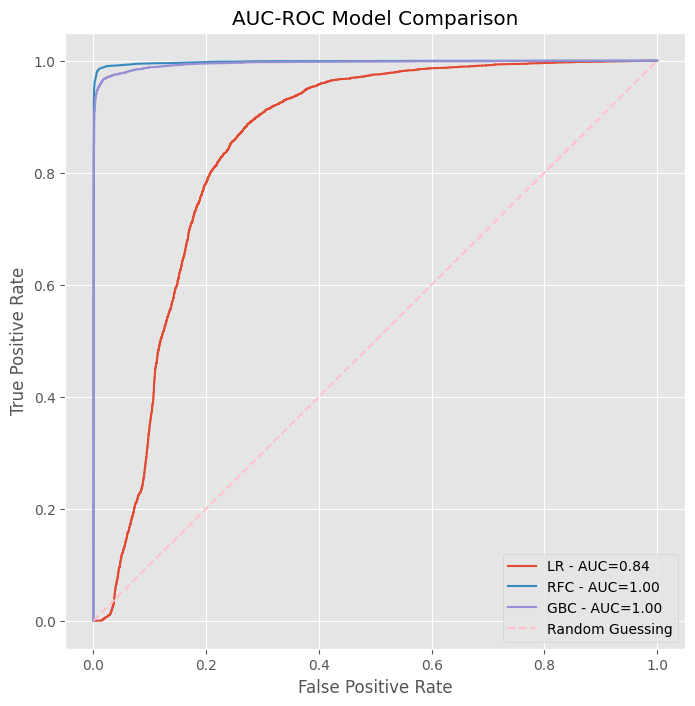

In [ ]:
plt.figure(figsize=(8,8))

for model_name, model in my_classifiers.items():
    #cross-val training and prediction using prob scores
    y_pred_prob = cross_val_predict(model, X_resampled, y_resampled, cv=kfold, method='predict_proba')[:,1]

    # calculate the auc score and curve
    auc = roc_auc_score(y_resampled, y_pred_prob)
    print(f'{model_name}: AUC= {auc}')

    #false and true positive rates
    fpr, tpr, thresh = roc_curve(y_resampled, y_pred_prob)

    #build a curve for each model
    plt.plot(fpr, tpr, label=f'{model_name} - AUC={auc:.2f}')

plt.plot([0,1], [0,1], linestyle='--', color='pink', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Model Comparison')
plt.legend()

* Gradient Booster is the best estimator out of the three models trained on.
* Gradient Boosting and Random Forest have ideal AUC score and makes it best models analysed so far.

In [340]:
X_test.shape, y_test.shape

((2399, 18), (2399,))

In [364]:
X_test_org = ss.inverse_transform(X_test)
df_analysis = pd.DataFrame(X_test_org, columns=X_test.columns)
df_analysis.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.82,0.95,6.0,191.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.18,0.86,5.0,267.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.63,0.98,4.0,160.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.43,0.51,2.0,149.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.51,0.98,4.0,245.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [366]:
df_analysis['left_actual'] = y_test.reset_index(drop=True)
df_analysis['left_predicted'] = y_pred_['GBC']
df_analysis.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,left_actual,left_predicted
0,0.82,0.95,6.0,191.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.18,0.86,5.0,267.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.63,0.98,4.0,160.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
3,0.43,0.51,2.0,149.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.51,0.98,4.0,245.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0


In [367]:
df_analysis['prob_score']=grid_search.best_estimator_.predict_proba(X_test)[:, 1]

In [368]:
df_analysis['prob_zone'] = pd.cut(df_analysis['prob_score'], 
                              bins=[0, 0.20, 0.60,0.90, np.inf], 
                              labels=['Safe Zone (Green)', 'Low-Risk Zone (Yellow)', 'Medium-Risk Zone (Orange)', 'High-Risk Zone (Red)'])
df_analysis['prob_zone'].value_counts()

prob_zone
Safe Zone (Green)            2010
High-Risk Zone (Red)          365
Low-Risk Zone (Yellow)         18
Medium-Risk Zone (Orange)       6
Name: count, dtype: int64

### Analysis Observation
 - **Safe Zone (Green) 2010 count** is the highest which means both actual and predicted says Employee stays. **No action needed in these cases**
 - **Low-Risk Zone (Yellow) 18 count**  false negatives. **Can be ignored as no impact for false alarm**
- **Medium-Risk Zone (Orange) 6 count**  false positive alarm. **Should try to reduce these cases**
- **High-Risk Zone (Red) 365 count**  true negatives alarm. **Should make retention plans for these cases upon further analysis of data**

In [375]:
df_retention = df_analysis[df_analysis['prob_zone']== 'High-Risk Zone (Red)']

In [376]:
df_retention.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,left_actual,left_predicted,prob_score
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000
mean,0.443370,0.718027,3.786301,206.449315,3.893151,0.063014,0.005479,0.400000,0.090411,0.041096,...,0.049315,0.019178,0.054795,0.046575,0.230137,0.175342,0.230137,0.980822,1.0,0.998680
std,0.268048,0.197565,1.806073,61.530577,0.970489,0.243321,0.073922,0.528319,0.287163,0.198785,...,0.216822,0.137339,0.227891,0.211017,0.421498,0.380782,0.421498,0.137339,0.0,0.007574
min,0.090000,0.450000,2.000000,126.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.908344
25%,0.110000,0.520000,2.000000,145.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.999479
50%,0.410000,0.790000,4.000000,228.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.999857
75%,0.740000,0.900000,5.000000,262.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.999925
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.999989


## Retention Strategy for Targeted Employees

* satisfaction_level is lower in general for these employees which should be improved
* Reduce number of projects worked on simultaneously
* Incentivise working under normal hours, discourage consistent extended hours of work.
* Offer promotion to high performing employees which in turn will improve satisfaction_level
* Provide bonuses or salary revision to low paid employess in this group

Above measures will help turn predicted left employess to stay back.